# <font color="brown">Linear Regression Case Study </font>

## <font color = "brown">Problem Statement </font>
Build a model to predict the price of house based on the data shared.

## <font color = "brown">Data Dictionary </font>
* price: Price of house
* area: Area of house
* bedrooms: Number of bedrooms
* bathrooms: Number of bathrooms
* stories: Number of floors
* mainroad: Is the property situated on the main road?
* guestroom: Does the house have guest room?
* basement: Does the house have basement?
* hotwaterheating: Does the house have hot water heating?
* airconditioning: Does the house have air conditioning?
* parking: Number of parking available
* prefarea: Is the property in the preffered area?
* furnishingstatus: Type of furnishing of the house

### <font color="blue"> Importing the libraries required

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

### <font color="blue"> Reading file and understanding the data

In [235]:
data = pd.read_csv("Housing.csv")

In [236]:
#Creating a copy of the data
df = data.copy()

**Let us check the head and tail of the data**

In [237]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [238]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


The data looks clean and the column names are also clean.

**Checking size and information about the data**

In [239]:
df.shape

(545, 13)

The data has 545 observations and 13 features.

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### <font color="blue"> Missing Value Check

In [241]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### <font color="blue"> Checking Duplicates

In [242]:
df.duplicated().sum()

np.int64(0)

## <font color="brown"> Exploratory Data Analysis

### <font color="blue"> Univariate Analysis

**Area Column**

<Axes: xlabel='area', ylabel='Count'>

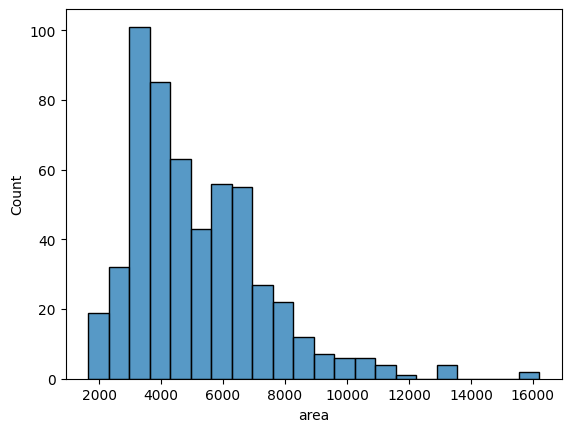

In [243]:
sns.histplot(data=df, x='area')

<Axes: xlabel='area'>

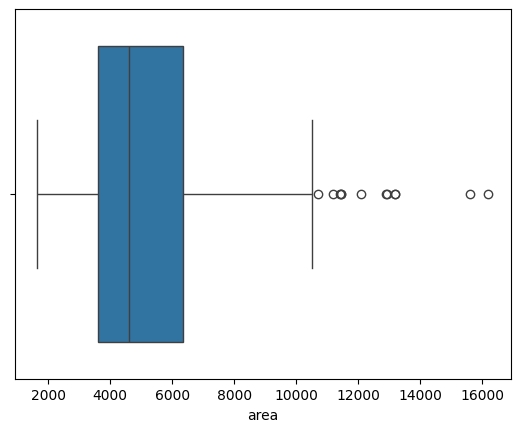

In [244]:
sns.boxplot(data=df, x='area')

The data is skewed towards the right and has couple of outliers. 

We will leave the values as is for now without capping them since they seem to be actual values.

**Parking Column**

<Axes: xlabel='parking', ylabel='count'>

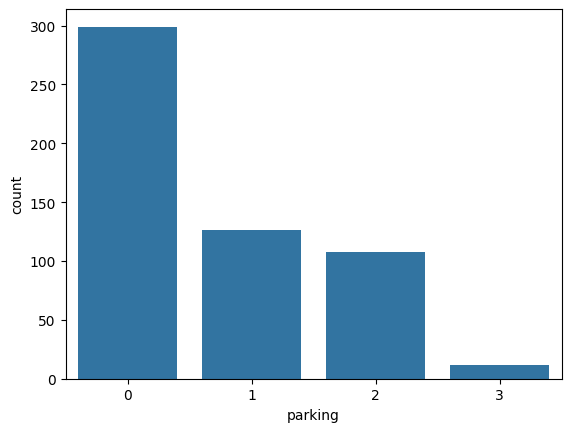

In [245]:
sns.countplot(data=df, x='parking')

We see that there are very less number of records for 3 parkings. 

Let us try to check the average price parking-wise.

In [246]:
df.groupby('parking').price.mean()

parking
0   4,136,016.722408
1   5,190,388.888889
2   5,896,328.148148
3   5,867,166.666667
Name: price, dtype: float64

We see that the average price for 2 and 3 parking are nearly similar.

Hence, we can replace 3 parkings to 2 parkings since average price of both are similar.

In [247]:
df.parking = df.parking.replace(3, 2)
df.parking.value_counts()

parking
0    299
1    126
2    120
Name: count, dtype: int64

The values have been replaced correctly.

**Bedrooms Column**

<Axes: xlabel='bedrooms', ylabel='count'>

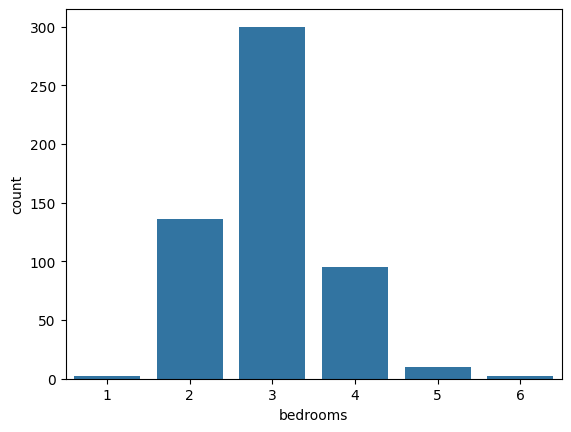

In [248]:
sns.countplot(data=df, x='bedrooms')

We see here that there are only few records for 1, 5 and 6 bedrooms.

Using the same approach that we did above let us try to see the mean of price bedroom-wise.

In [249]:
df.groupby('bedrooms').price.mean()

bedrooms
1   2,712,500.000000
2   3,632,022.058824
3   4,954,598.133333
4   5,729,757.894737
5   5,819,800.000000
6   4,791,500.000000
Name: price, dtype: float64

We see that the average price of 3 and 6 bedrooms; and 4 and 5 bedrooms are close by.

So, we will combine 6 with 3 and 5 with 4. 

We also see that 1 bedroom has very less number of rows, but the average price is very low for 1 bedroom, hence we will leave it as is.

In [250]:
# Replace values in 'bedrooms' column
df['bedrooms'] = df['bedrooms'].replace({6: 3, 5: 4})

df.bedrooms.value_counts()

bedrooms
3    302
2    136
4    105
1      2
Name: count, dtype: int64

**Stories Column**

<Axes: xlabel='stories', ylabel='count'>

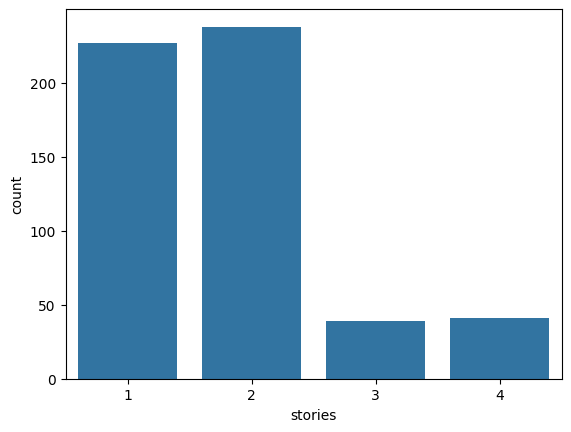

In [251]:
sns.countplot(data=df, x='stories')

Majority of the houses are 1 and 2 stories and few houses which are of 3 and 4 stories.

**Mainroad Column**

<Axes: xlabel='mainroad', ylabel='count'>

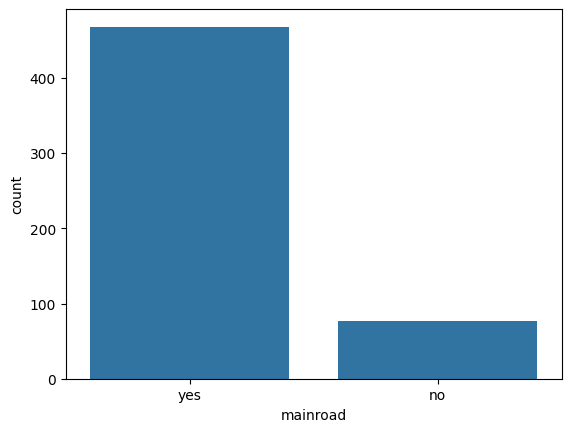

In [252]:
sns.countplot(data=df, x='mainroad')

Most of the houses are on the main road.

<Axes: xlabel='guestroom', ylabel='count'>

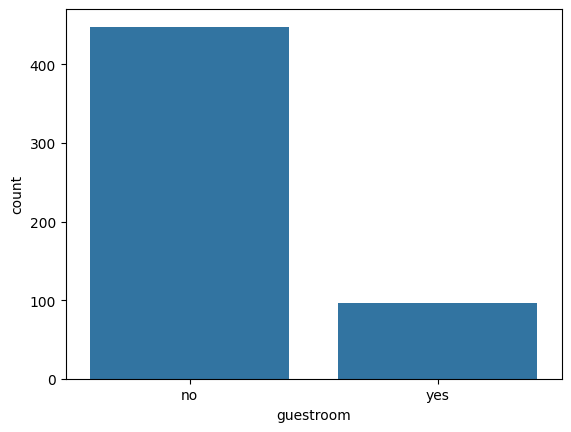

In [253]:
sns.countplot(data=df, x='guestroom')

Most of the houses do not have guestroom.

<Axes: xlabel='basement', ylabel='count'>

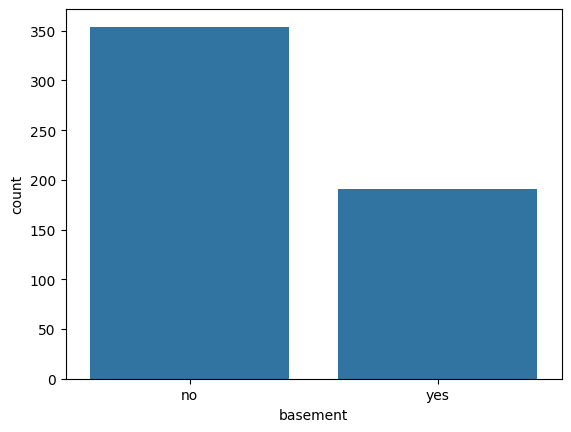

In [254]:
sns.countplot(data=df, x='basement')

Most of the houses do not have basement.

<Axes: xlabel='hotwaterheating', ylabel='count'>

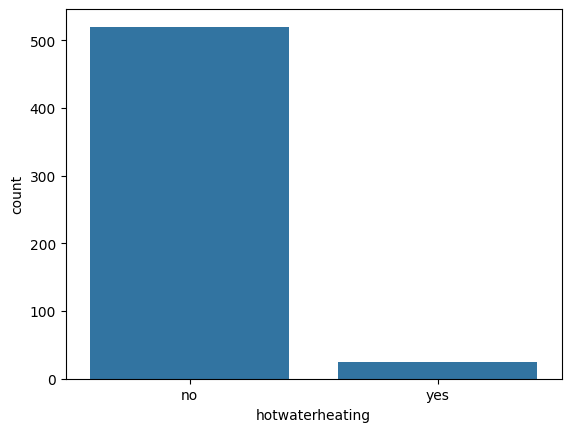

In [255]:
sns.countplot(data=df, x='hotwaterheating')

Most of the houses do not have hot water heating.

<Axes: xlabel='airconditioning', ylabel='count'>

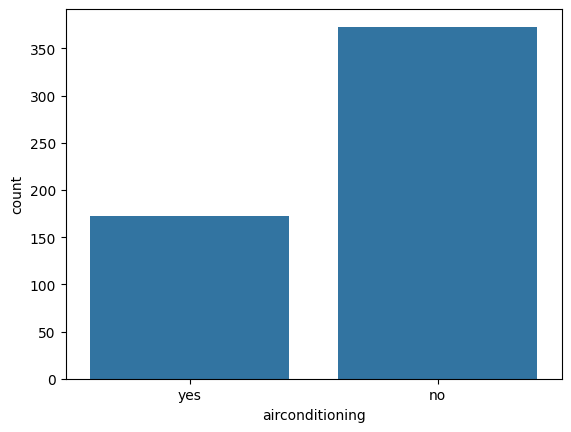

In [256]:
sns.countplot(data=df, x='airconditioning')

Most of the houses do not have air conditioning.

<Axes: xlabel='parking', ylabel='count'>

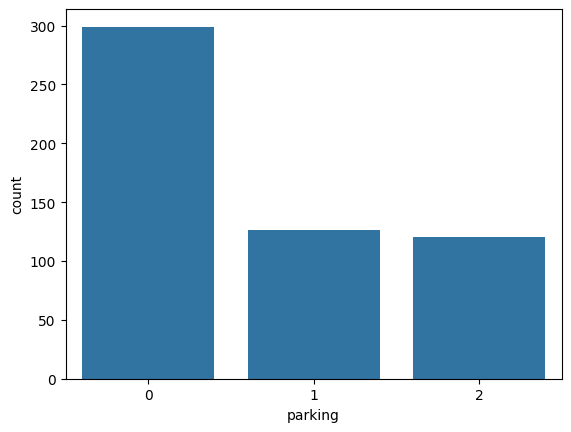

In [257]:
sns.countplot(data=df, x='parking')

Majority of the houses have no parking.

<Axes: xlabel='prefarea', ylabel='count'>

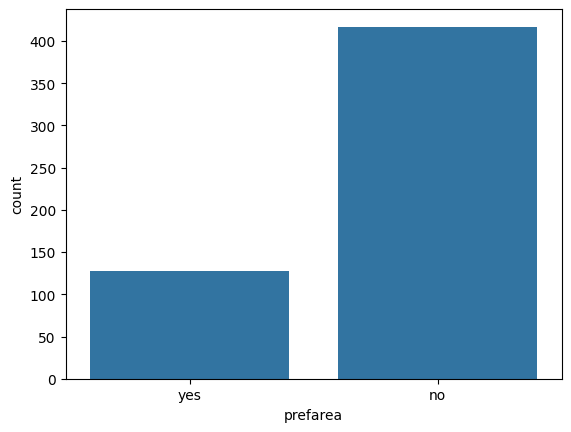

In [258]:
sns.countplot(data=df, x='prefarea')

Majority of the houses are not in preferred areas.

<Axes: xlabel='furnishingstatus', ylabel='count'>

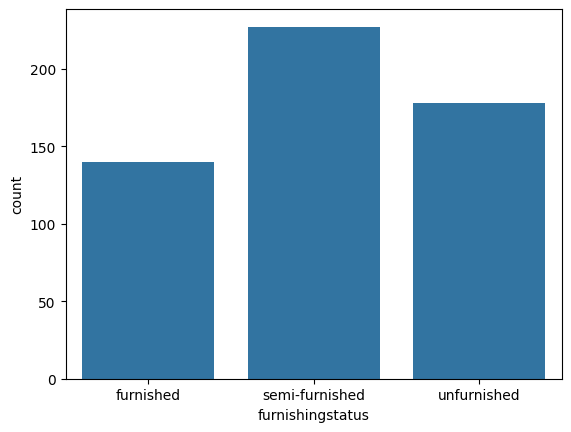

In [259]:
sns.countplot(data=df, x='furnishingstatus')

Most of the homes are semi-furnished and least homes are furnished.

## <font color="brown"> Model-1 (sklearn model with all columns)

### <font color = "blue">Data Preparation

**Preparing the data with some feature engineering to build the model.**

Splitting the data in independent and dependent dataset.

In [260]:
X_org = df.drop('price', axis= 1)
y_org = df['price']

Creating the dummy variables for the categorical columns.

In [261]:
X_org = pd.get_dummies(data=X_org,
                       columns=X_org.select_dtypes(include="object").columns.to_list(),
                       drop_first=True,
                       dtype=int)

X_org.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,2,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,2,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


Splitting the data in train and test. 70% data goes to train and 30% of the data goes to test.

In [262]:
X_org_train, X_org_test, y_org_train, y_org_test = train_test_split(X_org, y_org, test_size=0.3, random_state=1)

### <font color="blue"> Building the model

In [263]:
lr_org = LinearRegression()
lr_org.fit(X_org_train, y_org_train)

LinearRegression()

Checking the intercept of the model.

In [264]:
lr_org.intercept_

np.float64(84244.48616505135)

Checking the coefficients of the model.

In [265]:
lr_org.coef_

array([ 2.47135475e+02,  3.10128700e+04,  1.03412512e+06,  5.27306698e+05,
        2.95095062e+05,  4.66229857e+05,  2.70496193e+05,  5.47952115e+05,
        8.05182034e+05,  6.08629906e+05,  5.06558452e+05, -7.07827455e+04,
       -3.96477707e+05])

Building the linear regression formula.

In [266]:
intercept = lr_org.intercept_
coefficients = lr_org.coef_

feature_names = X_org_train.columns
formula = f"y = {intercept:.2f}"
for name, coef in zip(feature_names, coefficients):
    formula += f" + ({coef:.2f} * {name})"

print("Linear Regression Formula:")
print(formula)


Linear Regression Formula:
y = 84244.49 + (247.14 * area) + (31012.87 * bedrooms) + (1034125.12 * bathrooms) + (527306.70 * stories) + (295095.06 * parking) + (466229.86 * mainroad_yes) + (270496.19 * guestroom_yes) + (547952.12 * basement_yes) + (805182.03 * hotwaterheating_yes) + (608629.91 * airconditioning_yes) + (506558.45 * prefarea_yes) + (-70782.75 * furnishingstatus_semi-furnished) + (-396477.71 * furnishingstatus_unfurnished)


Predicting on the train and test set using the model created.

In [267]:
train_org_pred = lr_org.predict(X_org_train)
test_org_pred = lr_org.predict(X_org_test)

### <font color="blue"> Model - 1 Metrics

Checking the R2 of the model.

In [268]:
train_org_r2 = r2_score(y_true=y_org_train, y_pred = train_org_pred)
test_org_r2 = r2_score(y_true=y_org_test, y_pred = test_org_pred )

print(train_org_r2)
print(test_org_r2)

0.6817906721202591
0.6667598527264815


Checking the RMSE of the model.

In [269]:
train_org_rmse = root_mean_squared_error(y_true=y_org_train, y_pred = train_org_pred)
test_org_rmse = root_mean_squared_error(y_true=y_org_test, y_pred = test_org_pred )

print(train_org_rmse)
print(test_org_rmse)

1015843.6934553554
1164659.9257797478


**We see that the model 1 is not over-fitting and we have R2 of train as 0.68 and R2 of test as 0.66**

**However, the RMSE that we see is very high, since the target variable is of a high scale.**

## <font color="brown"> Model-2 (sklearn model with normalized target variable)

### <font color = "blue">Normalizing the target variable

Let us now normalize the target variable using log and build the model again.

Doing a log transformation will bring the high scale target variable to a smaller scale.

Once we do the log transformation, we do not need the original target variable and it can be dropped.

The new transformed variable will become the new target variable.

In [270]:
df['log_price'] = np.log(df['price'])

#Dropping the price variable
df = df.drop('price', axis=1)

### <font color="blue">Preparing the data

Splitting the data in independent and dependent dataset.

In [271]:
X_log = df.drop('log_price', axis= 1)
y_log = df['log_price']

Creating the dummy variables for the categorical columns.

In [272]:
X_log = pd.get_dummies(data=X_log,
                       columns=X_log.select_dtypes(include="object").columns.to_list(),
                       drop_first=True,
                       dtype=int)

X_log.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,2,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,2,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


Splitting the data in train and test. 70% data goes to train and 30% of the data goes to test.

In [273]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.3, random_state=1)

### <font color="blue"> Building the Model

In [274]:
lr_log = LinearRegression()
lr_log.fit(X_log_train, y_log_train)

LinearRegression()

Checking the intercept of the model.

In [312]:
lr_log.intercept_

np.float64(14.347338357831656)

Checking the coefficients of the model

In [313]:
lr_log.coef_

array([ 4.77449356e-05,  1.41920105e-02,  1.82690741e-01,  1.05623545e-01,
        5.33305883e-02,  1.36475077e-01,  6.49003645e-02,  1.30355865e-01,
        1.47010745e-01,  1.23856822e-01,  1.04722574e-01,  7.02491491e-03,
       -1.08172489e-01])

Building the linear regression formula

In [314]:
intercept = lr_log.intercept_
coefficients = lr_log.coef_

feature_names = X_log_train.columns
formula = f"y = {intercept:.2f}"
for name, coef in zip(feature_names, coefficients):
    formula += f" + ({coef:.2f} * {name})"

print("Linear Regression Formula:")
print(formula)

Linear Regression Formula:
y = 14.35 + (0.00 * area) + (0.01 * bedrooms) + (0.18 * bathrooms) + (0.11 * stories) + (0.05 * parking) + (0.14 * premium_features_count) + (0.06 * premium_features_score) + (0.13 * guestroom_to_basement_ratio) + (0.15 * luxury_score) + (0.12 * luxury_flag) + (0.10 * mainroad_airconditioning_flag) + (0.01 * mainroad_yes) + (-0.11 * guestroom_yes)


Predicting on the train and test set using the model created.

In [275]:
train_log_pred = lr_log.predict(X_log_train)
test_log_pred = lr_log.predict(X_log_test)

### <font color="blue"> Model - 2 Metrics

Checking the R2 of the model.

In [276]:
train_log_r2 = r2_score(y_true=y_log_train, y_pred = train_log_pred)
test_log_r2 = r2_score(y_true=y_log_test, y_pred = test_log_pred )

print(train_log_r2)
print(test_log_r2)

0.7053894645221641
0.6691186228824095


Checking the RMSE of the model.

In [277]:
train_log_rmse = root_mean_squared_error(y_true=y_log_train, y_pred = train_log_pred)
test_log_rmse = root_mean_squared_error(y_true=y_log_test, y_pred = test_log_pred )

print(train_log_rmse)
print(test_log_rmse)

0.19697632665008308
0.22516850771381136


## <font color="brown"> Model-3 (stats model with normalized target variable)

### <font color="blue">Preparing the data for stats model</font>

Adding constant to the independent dataset.

In [278]:
X_log_train = sm.add_constant(X_log_train)
X_log_train.head()

X_log_test = sm.add_constant(X_log_test)
X_log_test.head()

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
62,1.000000,6240,4,2,2,1,1,0,0,0,1,0,0,0
247,1.000000,8400,4,1,4,2,1,0,0,0,0,0,0,1
142,1.000000,10500,4,2,2,1,1,0,0,0,0,0,1,0
107,1.000000,6420,3,1,3,0,1,0,1,0,0,1,0,1
483,1.000000,6615,3,1,2,0,1,0,0,0,0,0,1,0


### <font color="blue">Building the stats model

Building the stats model and checking the summary of the model.

In [279]:
olsmodel_1 = sm.OLS(y_log_train, X_log_train).fit()
print(olsmodel_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     67.59
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           6.48e-89
Time:                        00:23:08   Log-Likelihood:                 78.384
No. Observations:                 381   AIC:                            -128.8
Df Residuals:                     367   BIC:                            -73.57
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### <font color="blue"> Checking Multicollinearity

In [280]:
def calculate_vif(X): #Pass the dataframe here
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_data

In [281]:
calculate_vif(X_log_train)

,Variable,VIF
0,const,34.498486
1,area,1.327821
2,bedrooms,1.484961
3,bathrooms,1.308372
4,stories,1.519909
5,parking,1.217334
6,mainroad_yes,1.182434
7,guestroom_yes,1.233031
8,basement_yes,1.389933
9,hotwaterheating_yes,1.047465


We see here that none of the variables have a multicollinearity greater than 5.

So we can go ahead with building the final model and checking for significant variables.

### <font color="blue">Checking Significant Variables

In [282]:
olsmodel_1 = sm.OLS(y_log_train, X_log_train).fit()
print(olsmodel_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     67.59
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           6.48e-89
Time:                        00:23:08   Log-Likelihood:                 78.384
No. Observations:                 381   AIC:                            -128.8
Df Residuals:                     367   BIC:                            -73.57
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Removing the insignificant variables**

In [283]:
import statsmodels.api as sm

def remove_insignificant_variables(data, target, threshold=0.05):

    significant_vars = list(data.columns)  # Start with all variables
    while True:
        # Fit the model with the current significant variables
        X = data[significant_vars]  # Use the provided data directly
        model = sm.OLS(target, X).fit()
        
        # Get p-values for all variables
        p_values = model.pvalues
        
        # Check if the maximum p-value exceeds the threshold
        max_p_value = p_values.max()
        if max_p_value > threshold:
            # Find the variable with the highest p-value
            insignificant_var = p_values.idxmax()
            if insignificant_var == 'const':  # Avoid dropping the constant term
                break
            
            # Remove the insignificant variable
            if insignificant_var in significant_vars:
                significant_vars.remove(insignificant_var)
                print(f"Removing variable: {insignificant_var} (p-value: {max_p_value:.4f})")
            else:
                print(f"Error: {insignificant_var} not in significant_vars")
                break
        else:
            # Stop if all variables are significant
            break
    
    print("Final Significant Variables:", significant_vars)
    return model, significant_vars


In [284]:
# Removing the insignificant variables from the model
olsmodel_1, significant_variables = remove_insignificant_variables(X_log_train, y_log_train)

# Display the summary of the final model
print(olsmodel_1.summary())


Removing variable: furnishingstatus_semi-furnished (p-value: 0.7876)
Removing variable: bedrooms (p-value: 0.4227)
Final Significant Variables: ['const', 'area', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_unfurnished']
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     80.10
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           1.15e-90
Time:                        00:23:08   Log-Likelihood:                 78.013
No. Observations:                 381   AIC:                            -132.0
Df Residuals:                     369   BIC:                            -84.71
Df Model:                   

We observe here that all variables with a p-value greater than 0.05 have been dropped.

Now, we have the list of variables which are neither multicollinear nor insignificant.

In [285]:
X_log_train1 = X_log_train[significant_variables]
X_log_test1 = X_log_test[significant_variables]

Building the linear regression formula

In [315]:
# Extract the model's parameters (coefficients and intercept)
params = olsmodel_1.params

# Build the regression formula
formula = f"{olsmodel_1.model.endog_names} = {params['const']:.4f}"  # Start with the intercept
for variable, coefficient in params.items():
    if variable != "const":  # Skip the intercept (already added)
        sign = "+" if coefficient >= 0 else "-"
        formula += f" {sign} {abs(coefficient):.4f} * {variable}"

# Display the regression formula
print("Regression Formula:")
print(formula)

Regression Formula:
log_price = 14.3812 + 0.0000 * area + 0.1865 * bathrooms + 0.1101 * stories + 0.0547 * parking + 0.1321 * mainroad_yes + 0.0640 * guestroom_yes + 0.1333 * basement_yes + 0.1477 * hotwaterheating_yes + 0.1239 * airconditioning_yes + 0.1051 * prefarea_yes - 0.1136 * furnishingstatus_unfurnished


Predicting on the train and test set using the model created.

In [286]:
train_log_ols_pred = olsmodel_1.predict(X_log_train1)
test_log_ols_pred = olsmodel_1.predict(X_log_test1)

### <font color="blue"> Model - 3 Metrics

Checking the R2 of the model.

In [287]:
train_ols_log_r2 = r2_score(y_true=y_log_train, y_pred = train_log_ols_pred)
test_ols_log_r2 = r2_score(y_true=y_log_test, y_pred = test_log_ols_pred )

print(train_ols_log_r2)
print(test_ols_log_r2)

0.7048151832331018
0.6655359409296112


Checking the RMSE of the model.

In [288]:
train_ols_log_rmse = root_mean_squared_error(y_true=y_log_train, y_pred = train_log_ols_pred)
test_ols_log_rmse = root_mean_squared_error(y_true=y_log_test, y_pred = test_log_ols_pred )

print(train_ols_log_rmse)
print(test_ols_log_rmse)

0.19716821514863542
0.22638425337527762


## <font color="brown"> Model-4 (sklearn model with feature engineered columns)

Doing Chisq test to check if the categorical variables are dependent on each other. In case, they are dependent we can create new variables combining few of them.

In [289]:
import pandas as pd
from scipy.stats import chi2_contingency

def chi_squared_dependency(data, categorical_vars, threshold=0.05):
    results = []
    
    for i, var1 in enumerate(categorical_vars):
        for var2 in categorical_vars[i + 1:]:
            # Create a contingency table
            contingency_table = pd.crosstab(data[var1], data[var2])
            
            # Perform the chi-squared test
            chi2, p, _, _ = chi2_contingency(contingency_table)
            
            # Categorize the relationship
            dependency = 'Dependent' if p < threshold else 'Independent'
            
            # Append the result
            results.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'p-value': p,
                'Dependency': dependency
            })
    
    return pd.DataFrame(results)



In [290]:
categorical_vars = ['furnishingstatus', 'mainroad', 'guestroom', 'basement', 
                    'hotwaterheating', 'airconditioning', 'prefarea']

# Run the chi-squared dependency analysis
dependency_results = chi_squared_dependency(data=df, categorical_vars=categorical_vars)

# Display the full results
print(dependency_results)

          Variable 1       Variable 2  p-value   Dependency
0   furnishingstatus         mainroad 0.001239    Dependent
1   furnishingstatus        guestroom 0.021962    Dependent
2   furnishingstatus         basement 0.019403    Dependent
3   furnishingstatus  hotwaterheating 0.271152  Independent
4   furnishingstatus  airconditioning 0.000660    Dependent
5   furnishingstatus         prefarea 0.038072    Dependent
6           mainroad        guestroom 0.046057    Dependent
7           mainroad         basement 0.368993  Independent
8           mainroad  hotwaterheating 1.000000  Independent
9           mainroad  airconditioning 0.019869    Dependent
10          mainroad         prefarea 0.000006    Dependent
11         guestroom         basement 0.000000    Dependent
12         guestroom  hotwaterheating 1.000000  Independent
13         guestroom  airconditioning 0.001901    Dependent
14         guestroom         prefarea 0.000290    Dependent
15          basement  hotwaterheating 1.

In [291]:
# Filter dependent variables
dependent_pairs = dependency_results[dependency_results['Dependency'] == 'Dependent']
print("\nDependent Variable Pairs:\n", dependent_pairs)


Dependent Variable Pairs:
           Variable 1       Variable 2  p-value Dependency
0   furnishingstatus         mainroad 0.001239  Dependent
1   furnishingstatus        guestroom 0.021962  Dependent
2   furnishingstatus         basement 0.019403  Dependent
4   furnishingstatus  airconditioning 0.000660  Dependent
5   furnishingstatus         prefarea 0.038072  Dependent
6           mainroad        guestroom 0.046057  Dependent
9           mainroad  airconditioning 0.019869  Dependent
10          mainroad         prefarea 0.000006  Dependent
11         guestroom         basement 0.000000  Dependent
13         guestroom  airconditioning 0.001901  Dependent
14         guestroom         prefarea 0.000290  Dependent
17          basement         prefarea 0.000000  Dependent
18   hotwaterheating  airconditioning 0.004876  Dependent
20   airconditioning         prefarea 0.008498  Dependent


### <font color="blue"> Feature Engineering

**Creating interaction variables**

In [292]:
# Interaction variables capture dependencies between two variables identified as dependent in the chi-squared test.
# These variables are expected to capture unique relationships between the combined features.

# Interaction between furnishing status and proximity to main road
# Why: Furnished houses on main roads might be more desirable for buyers.
df['furnishingstatus_x_mainroad'] = df['furnishingstatus'] + "_" + df['mainroad']


# Interaction between proximity to main road and whether it's in a preferred area
# Why: Houses on main roads in preferred areas could attract premium prices.
df['mainroad_x_prefarea'] = df['mainroad'] + "_" + df['prefarea']


# Interaction between guestroom and basement
# Why: A house with both a guestroom and a basement might appeal to buyers seeking spacious properties.
df['guestroom_x_basement'] = df['guestroom'] + "_" + df['basement']


# Interaction between air conditioning and preferred area
# Why: Air-conditioned houses in preferred areas might fetch higher demand in warm climates.
df['airconditioning_x_prefarea'] = df['airconditioning'] + "_" + df['prefarea']


# Interaction between guestroom and preferred area
# Why: A guestroom in a preferred area could be marketed as a luxury feature.
df['guestroom_x_prefarea'] = df['guestroom'] + "_" + df['prefarea']



**Creating aggregated features**

In [293]:
# Aggregated features combine the effects of multiple related variables into a single numeric feature.

# Count of premium features (e.g., guestroom, basement, air conditioning, etc.)
# Why: Higher counts of premium features indicate more luxurious properties.
df['premium_features_count'] = (
    df[['guestroom', 'basement', 'airconditioning', 'hotwaterheating', 'prefarea']] == 'Yes'
).sum(axis=1)


# Weighted score for premium features based on perceived importance
# Why: Weighted scores prioritize more critical features (e.g., prefarea is weighted higher as it likely has a greater impact on pricing).
df['premium_features_score'] = (
    (df['guestroom'] == 'Yes') * 2 + 
    (df['basement'] == 'Yes') * 1.5 + 
    (df['airconditioning'] == 'Yes') * 1.5 +
    (df['hotwaterheating'] == 'Yes') * 1 +
    (df['prefarea'] == 'Yes') * 3
)



**Creating composite features**

In [294]:
# Composite features are created by combining variables into ratios or numerical scores.
# These features can reveal nuanced relationships that individual variables cannot capture.

# Ratio of guestroom to basement
# Why: The ratio captures whether guest rooms outnumber basements or vice versa, which might reflect space utilization.
df['guestroom_to_basement_ratio'] = (
    (df['guestroom'] == 'Yes').astype(int) / (df['basement'] == 'Yes').astype(int).replace(0, 1)
)


# Interaction score for luxury features
# Why: This score quantifies the overall "luxury appeal" of a house by combining key indicators like furnishing, location, and air conditioning.
df['luxury_score'] = (
    (df['prefarea'] == 'Yes').astype(int) * 3 +
    (df['furnishingstatus'] == 'Furnished').astype(int) * 2 +
    (df['airconditioning'] == 'Yes').astype(int)
)



**Creating interaction flags**

In [295]:
# Interaction flags are binary indicators that represent the presence of specific feature combinations.
# These flags help the model quickly identify key interactions.

# Flag for guestroom and preferred area combination
# Why: Houses with both guestrooms and in preferred areas might appeal to high-income buyers.
df['luxury_flag'] = (
    (df['guestroom'] == 'Yes') & (df['prefarea'] == 'Yes')
).astype(int)


# Flag for main road and air conditioning combination
# Why: Main road access combined with air conditioning might be critical for homes in warm, urban settings.
df['mainroad_airconditioning_flag'] = (
    (df['mainroad'] == 'Yes') & (df['airconditioning'] == 'Yes')
).astype(int)



In [296]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price,furnishingstatus_x_mainroad,mainroad_x_prefarea,guestroom_x_basement,airconditioning_x_prefarea,guestroom_x_prefarea,premium_features_count,premium_features_score,guestroom_to_basement_ratio,luxury_score,luxury_flag,mainroad_airconditioning_flag
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275,furnished_yes,yes_yes,no_no,yes_yes,no_yes,0,0.000000,0.000000,0,0,0
1,8960,4,4,4,yes,no,no,no,yes,2,no,furnished,16.321036,furnished_yes,yes_no,no_no,yes_no,no_no,0,0.000000,0.000000,0,0,0
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321036,semi-furnished_yes,yes_yes,no_yes,no_yes,no_yes,0,0.000000,0.000000,0,0,0
3,7500,4,2,2,yes,no,yes,no,yes,2,yes,furnished,16.318175,furnished_yes,yes_yes,no_yes,yes_yes,no_yes,0,0.000000,0.000000,0,0,0
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001,furnished_yes,yes_no,yes_yes,yes_no,yes_no,0,0.000000,0.000000,0,0,0


### <font color="blue">Preparing the data for model building

In [297]:
X_log = df.drop('log_price', axis= 1)
y_log = df['log_price']

In [298]:
X_log = pd.get_dummies(data=X_log,
                       columns=X_log.select_dtypes(include="object").columns.to_list(),
                       drop_first=True,
                       dtype=int)

X_log.head()

,area,bedrooms,bathrooms,stories,parking,premium_features_count,premium_features_score,guestroom_to_basement_ratio,luxury_score,luxury_flag,mainroad_airconditioning_flag,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,furnishingstatus_x_mainroad_furnished_yes,furnishingstatus_x_mainroad_semi-furnished_no,furnishingstatus_x_mainroad_semi-furnished_yes,furnishingstatus_x_mainroad_unfurnished_no,furnishingstatus_x_mainroad_unfurnished_yes,mainroad_x_prefarea_no_yes,mainroad_x_prefarea_yes_no,mainroad_x_prefarea_yes_yes,guestroom_x_basement_no_yes,guestroom_x_basement_yes_no,guestroom_x_basement_yes_yes,airconditioning_x_prefarea_no_yes,airconditioning_x_prefarea_yes_no,airconditioning_x_prefarea_yes_yes,guestroom_x_prefarea_no_yes,guestroom_x_prefarea_yes_no,guestroom_x_prefarea_yes_yes
0,7420,4,2,3,2,0,0.000000,0.000000,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,8960,4,4,4,2,0,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,9960,3,2,2,2,0,0.000000,0.000000,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
3,7500,4,2,2,2,0,0.000000,0.000000,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
4,7420,4,1,2,2,0,0.000000,0.000000,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0


In [299]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.3, random_state=1)

### <font color="blue"> Building the model

In [300]:
lr_log_fe = LinearRegression()
lr_log_fe.fit(X_log_train, y_log_train)

LinearRegression()

Checking the intercept of the model.

In [316]:
lr_log_fe.intercept_

np.float64(14.338351906342604)

Checking the coefficients of the model.

In [317]:
lr_log_fe.coef_

array([ 4.71760397e-05,  1.58560889e-02,  1.83376260e-01,  1.06186954e-01,
        5.35933652e-02, -4.99600361e-16,  6.59194921e-17, -1.07032438e-15,
        5.12610787e-16, -8.60422844e-16,  3.88578059e-16,  1.02727418e-01,
        2.80056281e-02,  9.27247475e-02,  1.49805304e-01,  7.58549986e-02,
       -1.09259794e-02,  3.31150444e-02, -4.74139442e-02,  6.17585857e-02,
        1.10749008e-04,  3.30042954e-02, -5.53784811e-02,  7.96453688e-03,
       -1.43173910e-01, -2.95205126e-02,  1.32247931e-01,  2.69842882e-02,
       -3.77348313e-02,  6.57404594e-02, -3.26669496e-02,  5.41140284e-02,
        2.17409702e-02,  1.52413161e-02,  5.41729235e-02, -2.61672954e-02])

Building the linear regression formula.

In [318]:
intercept = lr_log_fe.intercept_
coefficients = lr_log_fe.coef_

feature_names = X_log_train.columns
formula = f"y = {intercept:.2f}"
for name, coef in zip(feature_names, coefficients):
    formula += f" + ({coef:.2f} * {name})"

print("Linear Regression Formula:")
print(formula)

Linear Regression Formula:
y = 14.34 + (0.00 * area) + (0.02 * bedrooms) + (0.18 * bathrooms) + (0.11 * stories) + (0.05 * parking) + (-0.00 * premium_features_count) + (0.00 * premium_features_score) + (-0.00 * guestroom_to_basement_ratio) + (0.00 * luxury_score) + (-0.00 * luxury_flag) + (0.00 * mainroad_airconditioning_flag) + (0.10 * mainroad_yes) + (0.03 * guestroom_yes) + (0.09 * basement_yes) + (0.15 * hotwaterheating_yes) + (0.08 * airconditioning_yes) + (-0.01 * prefarea_yes) + (0.03 * furnishingstatus_semi-furnished) + (-0.05 * furnishingstatus_unfurnished) + (0.06 * furnishingstatus_x_mainroad_furnished_yes) + (0.00 * furnishingstatus_x_mainroad_semi-furnished_no) + (0.03 * furnishingstatus_x_mainroad_semi-furnished_yes) + (-0.06 * furnishingstatus_x_mainroad_unfurnished_no) + (0.01 * furnishingstatus_x_mainroad_unfurnished_yes) + (-0.14 * mainroad_x_prefarea_no_yes) + (-0.03 * mainroad_x_prefarea_yes_no) + (0.13 * mainroad_x_prefarea_yes_yes) + (0.03 * guestroom_x_basement_

Predicting the output on train and test using the model.

In [301]:
train_log_fe_pred = lr_log_fe.predict(X_log_train)
test_log_fe_pred = lr_log_fe.predict(X_log_test)

### <font color="blue"> Model-4 Metrics

Checking the R2 of the model

In [302]:
train_log_fe_r2 = r2_score(y_true=y_log_train, y_pred = train_log_fe_pred)
test_log_fe_r2 = r2_score(y_true=y_log_test, y_pred = test_log_fe_pred )

print(train_log_fe_r2)
print(test_log_fe_r2)

0.7112411852635645
0.6739234631707717


Checking the RMSE of the model

In [303]:
train_log_fe_rmse = root_mean_squared_error(y_true=y_log_train, y_pred = train_log_fe_pred)
test_log_fe_rmse = root_mean_squared_error(y_true=y_log_test, y_pred = test_log_fe_pred )

print(train_log_fe_rmse)
print(test_log_fe_rmse)

0.19501028755101266
0.22352765509151049


## <font color="brown"> Model Performance Comparison

In [304]:
train_r2_model_1 = train_org_r2
train_r2_model_2 = train_log_r2
train_r2_model_3 = train_ols_log_r2
train_r2_model_4 = train_log_fe_r2

test_r2_model_1 = test_org_r2
test_r2_model_2 = test_log_r2
test_r2_model_3 = test_ols_log_r2
test_r2_model_4 = test_log_fe_r2

train_rmse_model_1 = train_org_rmse
train_rmse_model_2 = train_log_rmse
train_rmse_model_3 = train_ols_log_rmse
train_rmse_model_4 = train_log_fe_rmse

test_rmse_model_1 = test_org_rmse
test_rmse_model_2 = test_log_rmse
test_rmse_model_3 = test_ols_log_rmse
test_rmse_model_4 = test_log_fe_rmse

# Create a dictionary with the metrics using variables
data = {
    "Model": [
        "Model-1: sklearn - All Columns", 
        "Model-2: sklearn - Log Target", 
        "Model-3: Statsmodel Log Target", 
        "Model-4: sklearn - Feature-Engineered"
    ],
    "Train R2": [train_r2_model_1, train_r2_model_2, train_r2_model_3, train_r2_model_4],
    "Test R2": [test_r2_model_1, test_r2_model_2, test_r2_model_3, test_r2_model_4],
    "Train RMSE": [train_rmse_model_1, train_rmse_model_2, train_rmse_model_3, train_rmse_model_4],
    "Test RMSE": [test_rmse_model_1, test_rmse_model_2, test_rmse_model_3, test_rmse_model_4]
}

metrics_df = pd.DataFrame(data)

# Adjust pandas display options
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.width', 1000)         # Set a wide display width
pd.options.display.float_format = '{:,.6f}'.format  # Format floats

# Display the DataFrame
print(metrics_df)


                                   Model  Train R2  Test R2       Train RMSE        Test RMSE
0         Model-1: sklearn - All Columns  0.681791 0.666760 1,015,843.693455 1,164,659.925780
1          Model-2: sklearn - Log Target  0.705389 0.669119         0.196976         0.225169
2         Model-3: Statsmodel Log Target  0.704815 0.665536         0.197168         0.226384
3  Model-4: sklearn - Feature-Engineered  0.711241 0.673923         0.195010         0.223528


## <font color="brown"> Tests of Assumptions

**Assumption 1:** Linearity

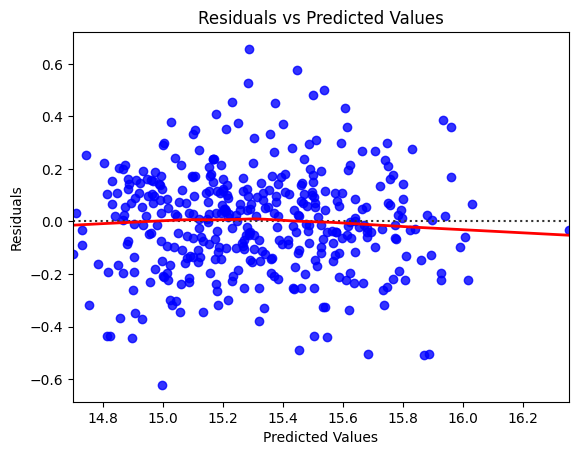

In [305]:
sns.residplot(x=train_log_fe_pred, y=y_log_train, lowess=True, color="blue", line_kws={"color": "red", "lw": 2})
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


**Assumption 2:** Normality of errors

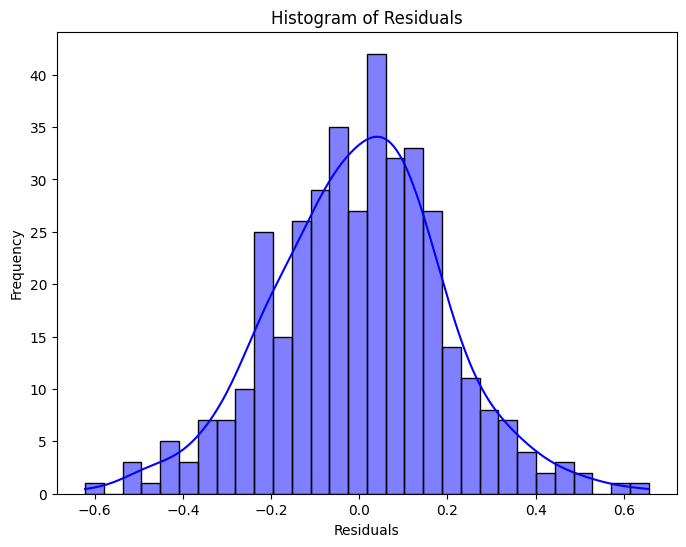

In [311]:
residuals = y_log_train - train_log_fe_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="blue", bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

**Assumption 3:** Homoscedasticity (Constant Variance of Errors)

In [307]:
# Add a constant to the exog (independent variables)
exog = sm.add_constant(pd.DataFrame({"y_pred": train_log_fe_pred}))

# Perform White's Test
white_test = het_white(residuals, exog)
white_stat, white_pval = white_test[0], white_test[1]

# Print Results
print(f"White Test: Statistic={white_stat}, p-value={white_pval}")
if white_pval > 0.05:
    print("Residuals are likely homoscedastic (Fail to Reject H0).")
else:
    print("Residuals are not homoscedastic (Reject H0).")

White Test: Statistic=0.1978033553134576, p-value=0.9058317671471813
Residuals are likely homoscedastic (Fail to Reject H0).


**Assumption 4:** Independence of errors from predictor variables

Scikit-learn is an excellent library for building predictive models, but it does not include built-in features for statistical diagnostics, such as Cook's Distance. This diagnostic is used to identify influential data points that might unduly affect the model. If you're working with Scikit-learn, you would need to calculate Cook's Distance manually using mathematical formulas. However, if diagnostics are a primary focus, libraries like Statsmodels provide these features out of the box. For example, Statsmodels makes it easy to compute Cook's Distance using model.get_influence().cooks_distance.

## <font color = "brown"> Final Model

In [319]:
intercept = lr_log_fe.intercept_
coefficients = lr_log_fe.coef_

feature_names = X_log_train.columns
formula = f"y = {intercept:.2f}"
for name, coef in zip(feature_names, coefficients):
    formula += f" + ({coef:.2f} * {name})"

print("Linear Regression Formula:")
print(formula)

Linear Regression Formula:
y = 14.34 + (0.00 * area) + (0.02 * bedrooms) + (0.18 * bathrooms) + (0.11 * stories) + (0.05 * parking) + (-0.00 * premium_features_count) + (0.00 * premium_features_score) + (-0.00 * guestroom_to_basement_ratio) + (0.00 * luxury_score) + (-0.00 * luxury_flag) + (0.00 * mainroad_airconditioning_flag) + (0.10 * mainroad_yes) + (0.03 * guestroom_yes) + (0.09 * basement_yes) + (0.15 * hotwaterheating_yes) + (0.08 * airconditioning_yes) + (-0.01 * prefarea_yes) + (0.03 * furnishingstatus_semi-furnished) + (-0.05 * furnishingstatus_unfurnished) + (0.06 * furnishingstatus_x_mainroad_furnished_yes) + (0.00 * furnishingstatus_x_mainroad_semi-furnished_no) + (0.03 * furnishingstatus_x_mainroad_semi-furnished_yes) + (-0.06 * furnishingstatus_x_mainroad_unfurnished_no) + (0.01 * furnishingstatus_x_mainroad_unfurnished_yes) + (-0.14 * mainroad_x_prefarea_no_yes) + (-0.03 * mainroad_x_prefarea_yes_no) + (0.13 * mainroad_x_prefarea_yes_yes) + (0.03 * guestroom_x_basement_

**Creating dataframe with the coefficients of the final model**

In [321]:
import pandas as pd

# Assuming intercept and coefficients are already available
intercept = lr_log_fe.intercept_
coefficients = lr_log_fe.coef_

# Combine intercept and coefficients into a dictionary
final_model_coef = {
    "Variable": ["Intercept"] + list(X_log_train.columns),
    "Coefficient": [intercept] + list(coefficients)
}

# Create a DataFrame
coefficients_df = pd.DataFrame(final_model_coef)

# Display the DataFrame
print("Coefficients DataFrame:")
print(coefficients_df)

Coefficients DataFrame:
                                          Variable  Coefficient
0                                        Intercept    14.338352
1                                             area     0.000047
2                                         bedrooms     0.015856
3                                        bathrooms     0.183376
4                                          stories     0.106187
5                                          parking     0.053593
6                           premium_features_count    -0.000000
7                           premium_features_score     0.000000
8                      guestroom_to_basement_ratio    -0.000000
9                                     luxury_score     0.000000
10                                     luxury_flag    -0.000000
11                   mainroad_airconditioning_flag     0.000000
12                                    mainroad_yes     0.102727
13                                   guestroom_yes     0.028006
14              

In [323]:
# Creating the dataframe
coefficients_df = pd.DataFrame(final_model_coef)


# Filter out rows where the coefficient is exactly zero
filtered_coefficients_df = coefficients_df[coefficients_df["Coefficient"] != 0]

filtered_coefficients_df

,Variable,Coefficient
0,Intercept,14.338352
1,area,0.000047
2,bedrooms,0.015856
3,bathrooms,0.183376
4,stories,0.106187
5,parking,0.053593
6,premium_features_count,-0.000000
7,premium_features_score,0.000000
8,guestroom_to_basement_ratio,-0.000000
9,luxury_score,0.000000


## <font color = "brown"> Model Insights

* The Intercept (14.338) represents the baseline log-transformed price of a property when all predictors are zero.
* area (0.000047): Larger property area positively influences the house price, as expected.
* bathrooms (0.1834): Additional bathrooms significantly increase house prices, reflecting the demand for convenience and luxury.
* stories (0.1062): Properties with more stories are valued higher, indicating a preference for multi-story homes.
* parking (0.0536): Parking availability positively influences property value.
* mainroad_yes (0.1027): Proximity to main roads increases house prices, likely due to better accessibility.
* prefarea_yes (−0.0109): Unexpectedly, being in a preferred area slightly reduces log-transformed price. This may indicate overpricing or saturation in these areas.
* furnishingstatus_unfurnished (−0.0474): Unfurnished homes are less valuable compared to semi-furnished or fully furnished homes.
* guestroom_x_basement_yes_no (−0.0377): Homes with a guestroom but no basement detract value.

## <font color="brown"> Recommendations

**Emphasize Key Features in Marketing and Pricing Strategies**
* Highlight properties with larger areas, more bathrooms, basements, and air conditioning in marketing materials. These features are strong drivers of house prices, as shown by their significant positive coefficients.
* For properties near main roads and in preferred areas, use premium pricing, as these interactions significantly enhance property value.


**Optimize Property Listings for Furnishing**
* Promote semi-furnished properties over unfurnished ones to attract higher bids. Semi-furnished homes add value and cater to buyers seeking partially ready-to-move homes.
* Consider offering furnishing packages or partnerships with furnishing companies to upsell unfurnished properties.


**Address Negative Factors**
* Properties near main roads but not in preferred areas should be marketed with added value propositions, such as soundproofing solutions, greenery, or enhanced community features to offset noise and traffic concerns.
* For unfurnished homes, consider adding essential furnishings to boost appeal and justify higher pricing.


**Reassess Investment in Luxury Features**
* Variables like luxury_score and premium_features have negligible or no impact on pricing. Avoid over-investing in features that do not significantly influence buyer decisions.
* Focus instead on practical, high-demand features such as parking, bathrooms, and basements.


**Enhance Data-Driven Decisions for Development and Renovation**
* Invest in building homes with guestrooms and basements, as this combination yields higher prices.
* Properties with hot water heating and air conditioning should be prioritized for renovations.
* For new developments, aim to build properties in preferred areas with easy access to main roads, as these maximize buyer interest and willingness to pay.